In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report)

In [2]:
df = pd.read_csv("climate_change_data.csv")
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [3]:
df.tail()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255
9999,2022-12-31 00:00:00.000000000,West Anthonyburgh,Sao Tome and Principe,12.661928,381.172746,2.260788,78.339658,99.243923,41.856539


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Date              10000 non-null object
Location          10000 non-null object
Country           10000 non-null object
Temperature       10000 non-null float64
CO2 Emissions     10000 non-null float64
Sea Level Rise    10000 non-null float64
Precipitation     10000 non-null float64
Humidity          10000 non-null float64
Wind Speed        10000 non-null float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


In [5]:
df.dtypes

Date               object
Location           object
Country            object
Temperature       float64
CO2 Emissions     float64
Sea Level Rise    float64
Precipitation     float64
Humidity          float64
Wind Speed        float64
dtype: object

In [6]:
#Null values
df.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [7]:
#Duplicates
df.duplicated().sum()

0

In [8]:
#Removing null values
df.dropna()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
5,2000-01-05 04:48:36.291629162,South Nathan,Saint Helena,6.229326,392.473317,1.122210,76.368331,48.973886,30.398908
6,2000-01-06 00:58:19.549954995,Port Richardfurt,Tuvalu,21.646738,387.648437,0.058471,9.650389,11.402284,15.720944
7,2000-01-06 21:08:02.808280828,Adambury,Australia,19.730800,448.180275,0.001415,93.360755,21.526350,29.993495
8,2000-01-07 17:17:46.066606660,Williamsonberg,Qatar,19.858114,379.618820,0.584881,6.218846,30.861949,37.519472
9,2000-01-08 13:27:29.324932493,North Thomas,Chad,14.121563,410.517072,-1.712224,15.351583,88.422794,47.922521


In [9]:
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


In [10]:
co2_count = df['CO2 Emissions'].value_counts()
print(co2_count)

448.238920    1
445.104323    1
403.648756    1
357.520635    1
421.831009    1
438.382586    1
415.157946    1
358.184599    1
353.298661    1
428.523598    1
226.370250    1
391.318001    1
443.728696    1
415.010448    1
361.950262    1
420.276786    1
375.419603    1
343.227667    1
440.362137    1
400.912882    1
310.507700    1
446.697494    1
381.706960    1
359.307517    1
420.604383    1
429.160695    1
376.243813    1
396.439639    1
523.839773    1
389.212696    1
             ..
354.539468    1
407.631587    1
437.668021    1
395.215366    1
401.323493    1
426.708313    1
475.303760    1
472.216708    1
482.737261    1
401.193254    1
403.974975    1
346.873435    1
397.533343    1
381.877681    1
349.675039    1
388.858640    1
407.171168    1
463.799857    1
433.691233    1
344.913359    1
446.324982    1
414.447038    1
374.071191    1
487.665643    1
359.907756    1
495.427885    1
399.775546    1
354.698652    1
401.759099    1
383.109491    1
Name: CO2 Emissions, Len

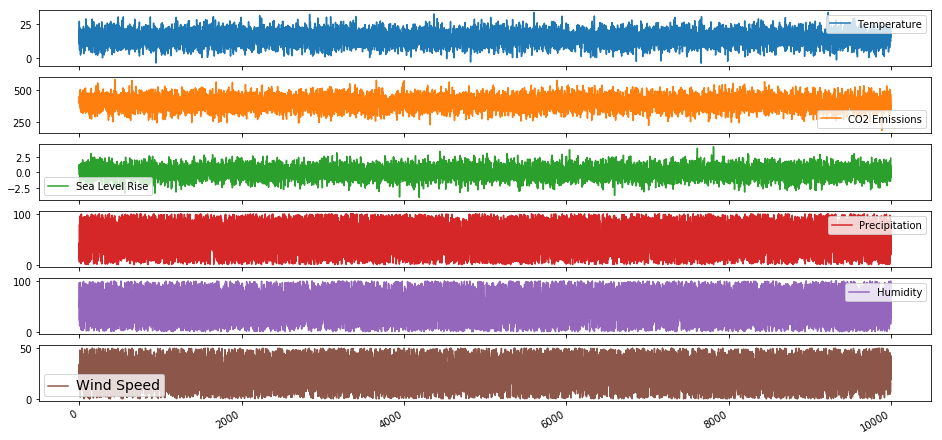

In [11]:
gr = df.plot(figsize = (16, 8), subplots=True)
legend = plt.legend()
legend.prop.set_size(14);

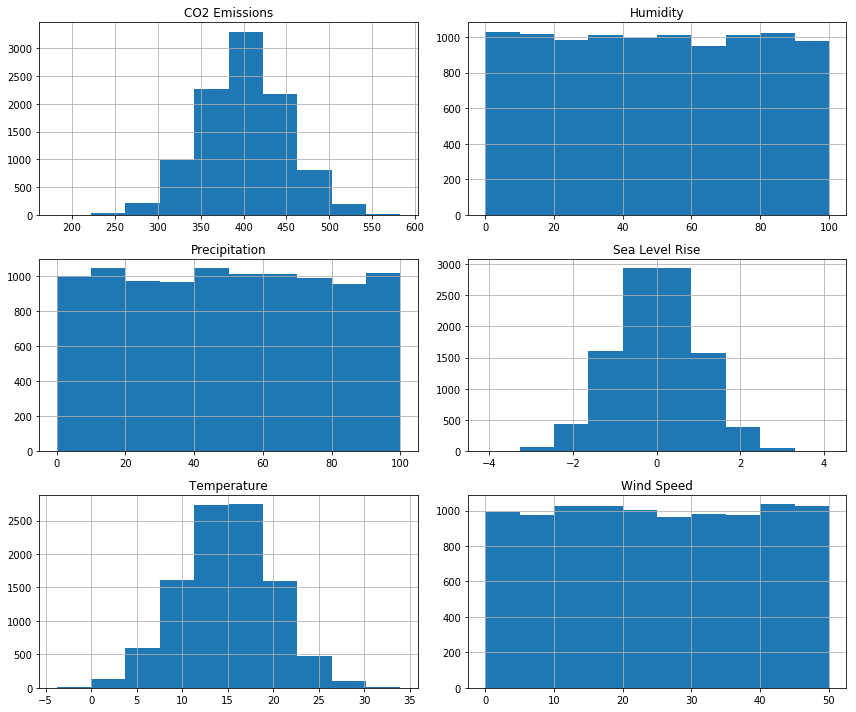

In [12]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

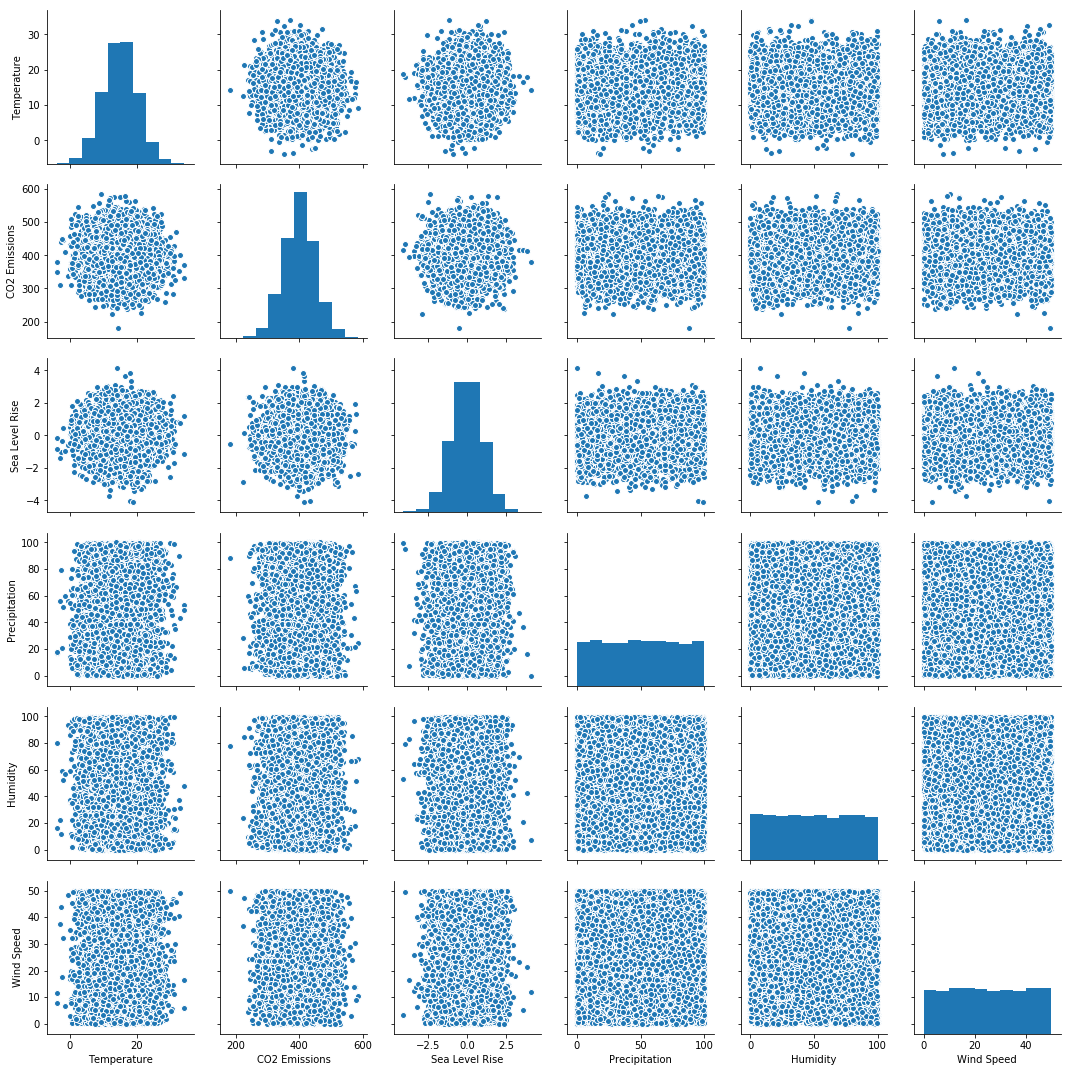

In [13]:
# Pairplot
sns.pairplot(df)
plt.show()

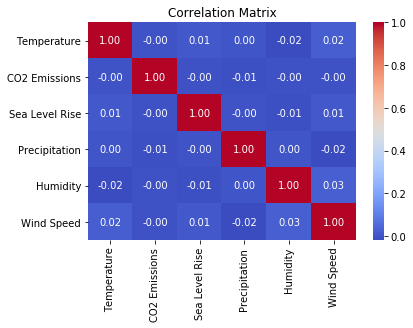

In [14]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [15]:
CE_India = df[(df['Country'] == 'India')].round(2)
CE_India

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
44,2000-02-06 23:07:43.366336633,Stewartbury,India,13.86,408.12,-0.08,77.50,31.36,26.26
153,2000-05-08 12:47:18.523852384,Port Jesus,India,14.56,441.46,0.01,72.78,64.90,44.93
420,2000-12-18 20:02:48.496849684,Lake Heather,India,8.05,352.50,-1.08,85.43,90.57,33.95
604,2001-05-22 09:51:28.028802880,Port Haydentown,India,12.44,380.04,-0.38,92.22,7.46,41.32
626,2001-06-09 21:25:19.711971192,Marisafort,India,19.58,412.25,1.49,55.68,63.58,44.65
754,2001-09-25 10:09:36.777677760,Jacobland,India,18.29,312.60,-0.56,29.79,29.24,47.93
764,2001-10-03 19:46:49.360936088,South Kimberlyshire,India,12.01,334.32,-0.05,55.82,98.89,32.54
1437,2003-04-22 04:49:02.214221408,New David,India,8.79,352.89,-0.77,98.62,99.59,49.08
2589,2005-12-14 23:27:35.805580544,South Robertstad,India,18.65,417.64,-0.49,74.03,20.66,43.86
2805,2006-06-14 10:27:19.603960384,Bowersfurt,India,15.70,462.74,-1.03,67.32,39.69,27.32


In [16]:
CE_India[['Date','Temperature','CO2 Emissions']].sort_values('Date', ascending=True)

,Date,Temperature,CO2 Emissions
44,2000-02-06 23:07:43.366336633,13.86,408.12
153,2000-05-08 12:47:18.523852384,14.56,441.46
420,2000-12-18 20:02:48.496849684,8.05,352.50
604,2001-05-22 09:51:28.028802880,12.44,380.04
626,2001-06-09 21:25:19.711971192,19.58,412.25
754,2001-09-25 10:09:36.777677760,18.29,312.60
764,2001-10-03 19:46:49.360936088,12.01,334.32
1437,2003-04-22 04:49:02.214221408,8.79,352.89
2589,2005-12-14 23:27:35.805580544,18.65,417.64
2805,2006-06-14 10:27:19.603960384,15.70,462.74


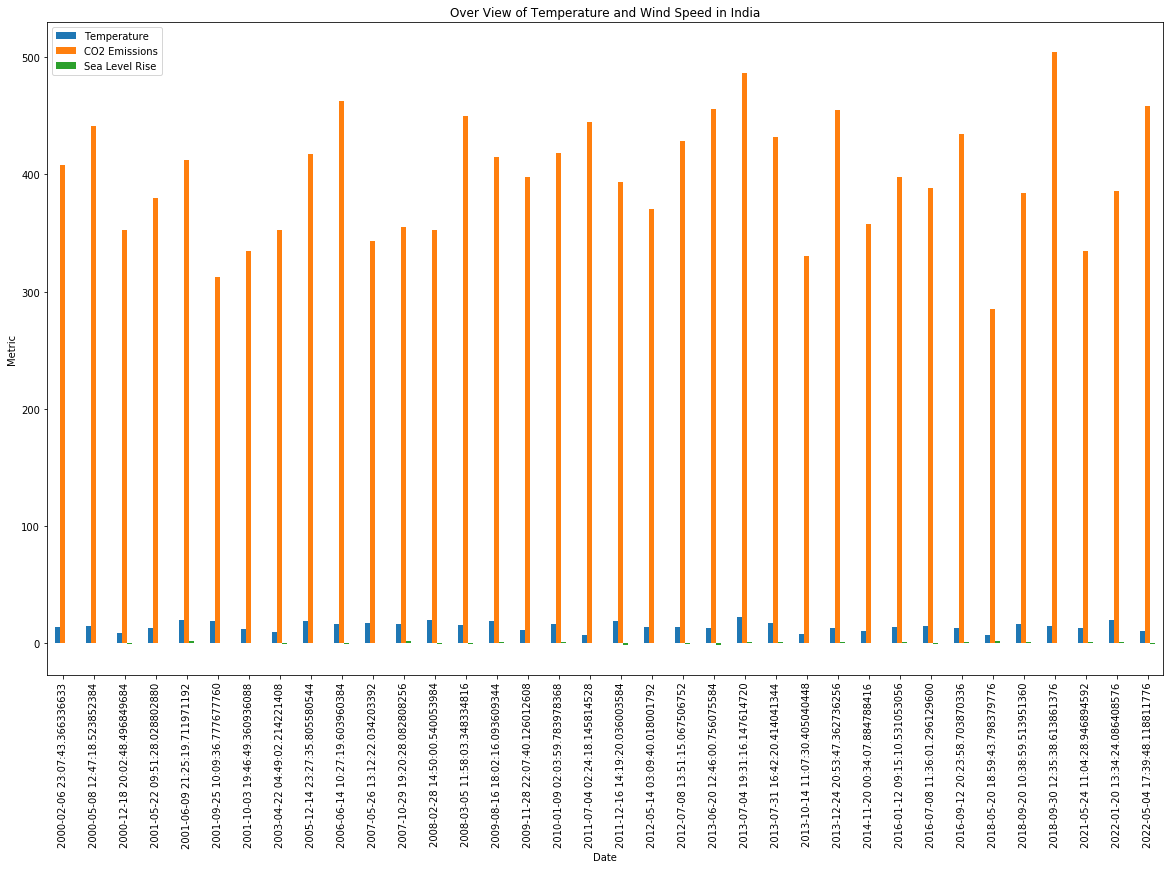

In [17]:
ce_india = CE_India[['Date','Temperature','CO2 Emissions', 'Sea Level Rise' ]].sort_values('Date', ascending=True)
ce_india.set_index('Date', inplace =True)
ce_india.plot(kind='bar', figsize=(20,12))

plt.xlabel('Date')
plt.ylabel('Metric')
plt.title('Over View of Temperature and Wind Speed in India');

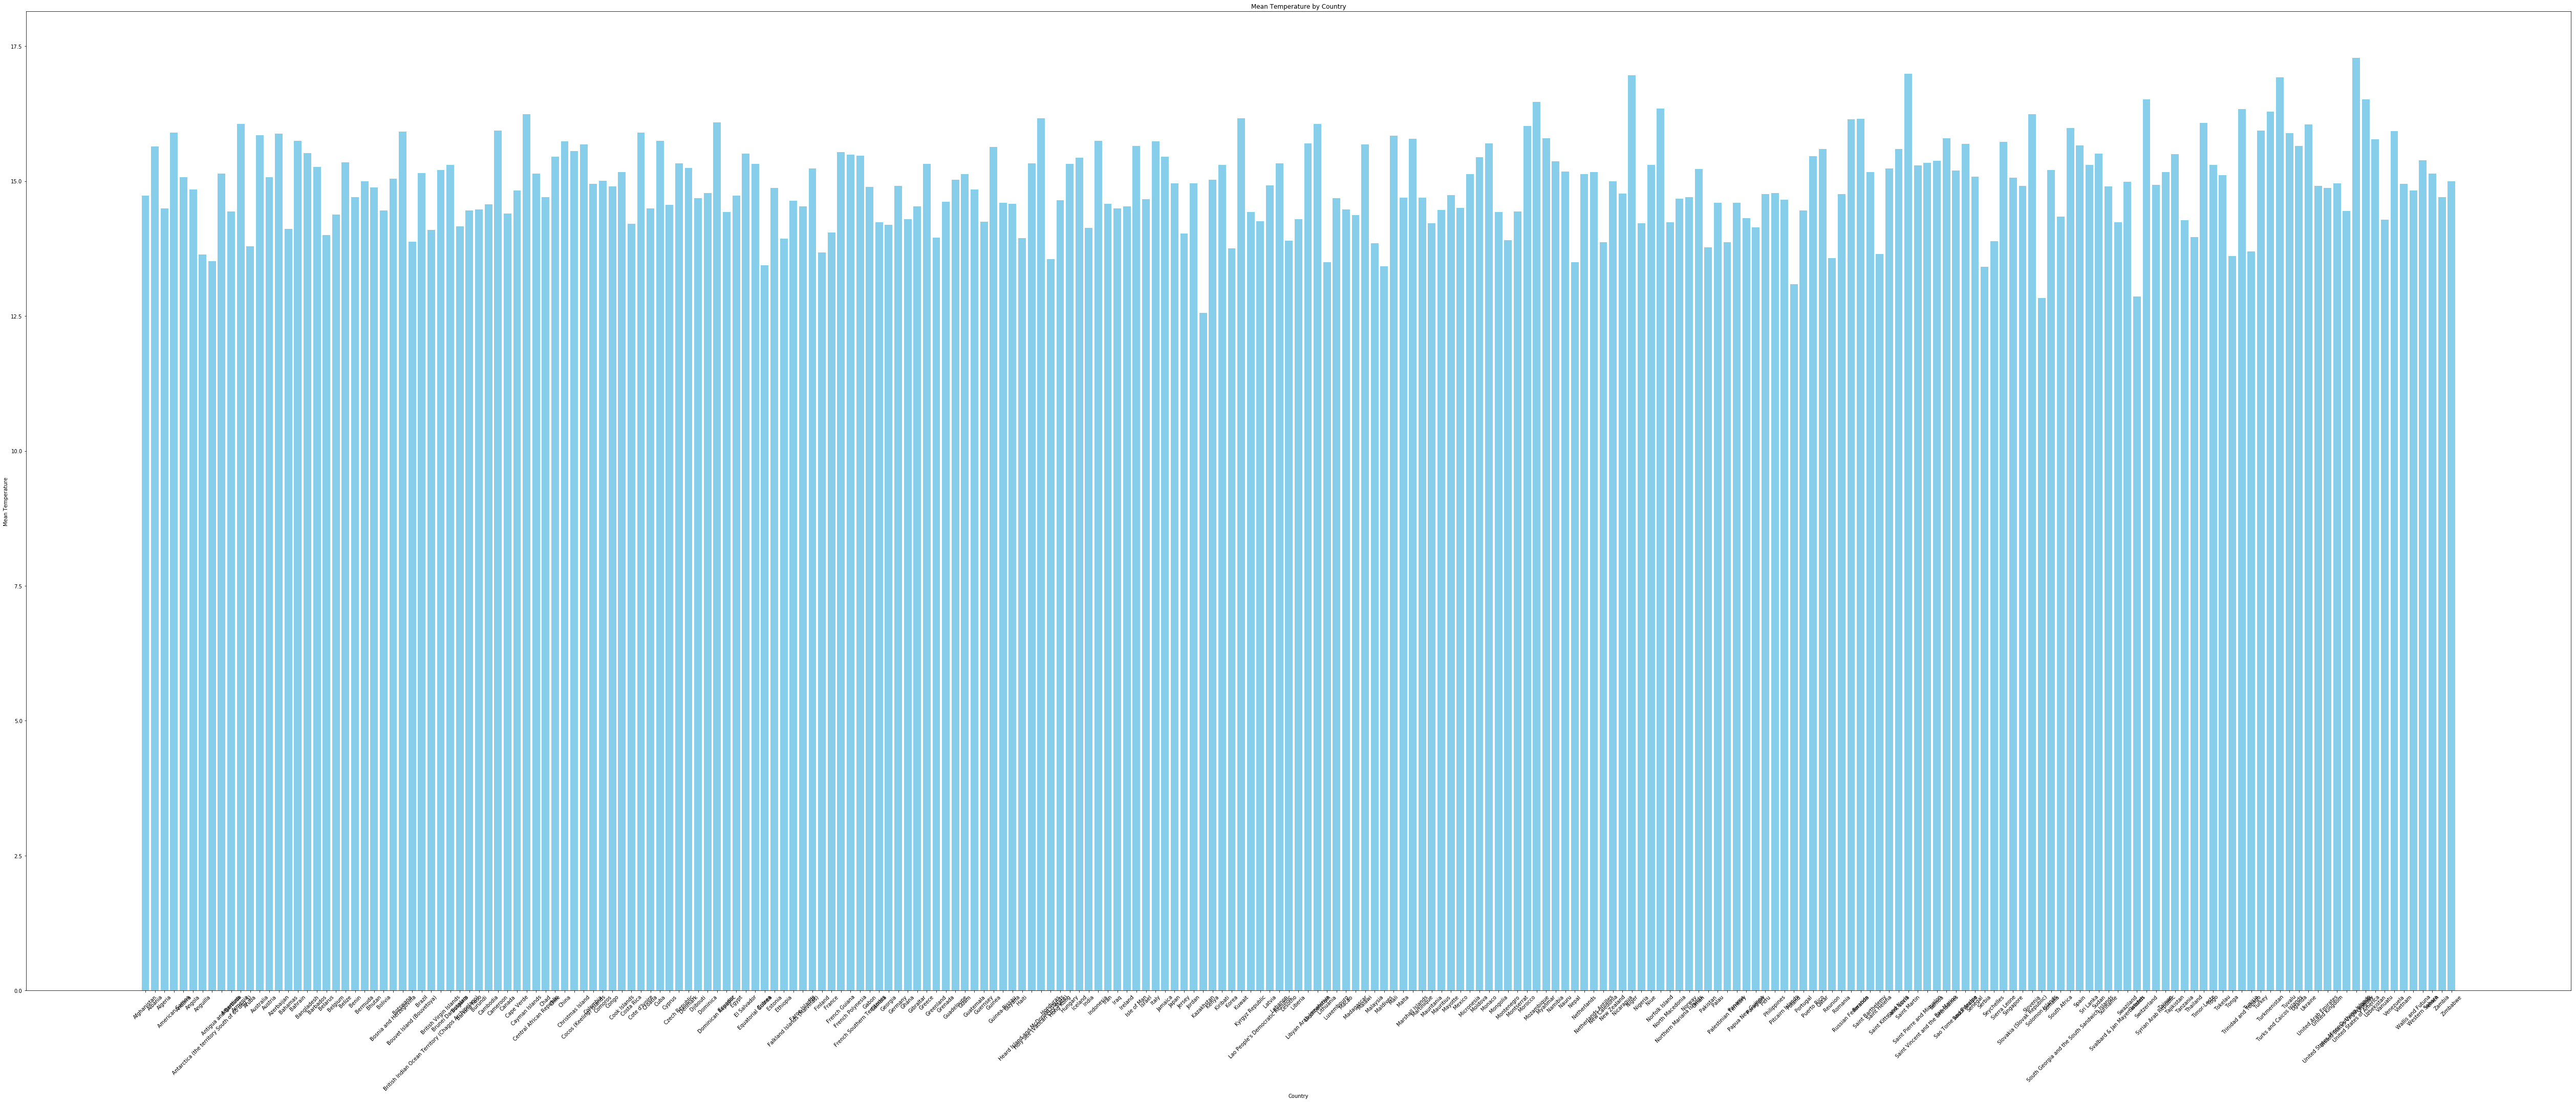

In [18]:
# Calculate the mean temperature for each country
mean_temp_by_country = df.groupby('Country')['Temperature'].mean().reset_index()

# Sort the DataFrame by mean temperature in descending order
mean_temp_by_country = mean_temp_by_country.sort_values(by='Temperature', ascending=False)

# Create the bar plot
plt.figure(figsize=(70, 30))
plt.bar(mean_temp_by_country['Country'], mean_temp_by_country['Temperature'], color='skyblue')
plt.title('Mean Temperature by Country')
plt.xlabel('Country')
plt.ylabel('Mean Temperature')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

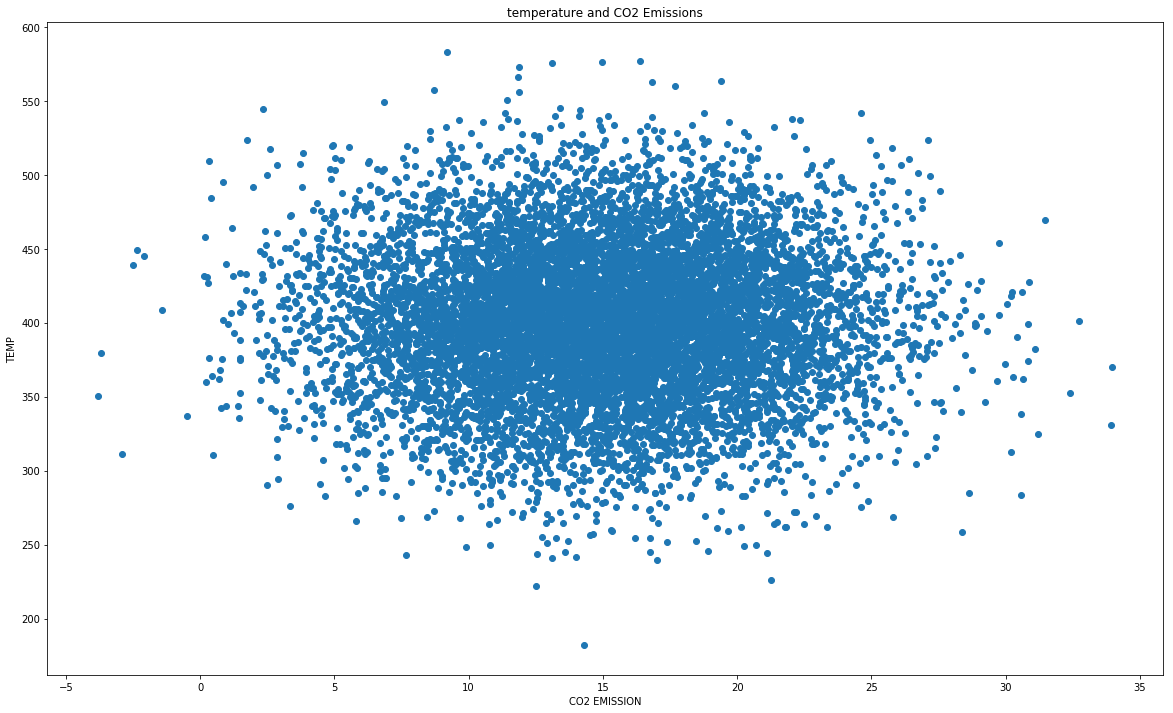

In [25]:
plt.figure(figsize = (20,12))
plt.scatter(data = df, x = 'Temperature',y = 'CO2 Emissions')
plt.xlabel("CO2 EMISSION")
plt.ylabel("TEMP")
plt.title('temperature and CO2 Emissions')
plt.show()

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Location"] = le.fit_transform(df["Location"])
df["Country"] = le.fit_transform(df["Country"])

In [51]:
X = df.drop(['Temperature', 'Date', 'Location', 'Country'], axis=1)  # Features
y = df['Temperature']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
mae = mean_absolute_error(y_test,y_pred)
print("MAE = ",mae)
rmse = np.sqrt(mse)
print("RMSE = ",rmse)


Mean Squared Error: 25.755635371031094
MAE =  4.090983028250873
RMSE =  5.07500102177636


In [59]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
#Predict
y_pred = tree_regressor.predict(X_test)
#Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
mae = mean_absolute_error(y_test,y_pred)
print("MAE = ",mae)
rmse = np.sqrt(mse)
print("RMSE = ",rmse)

Mean Squared Error: 53.37410655881905
MAE =  5.87121325424641
RMSE =  7.305758451989708


In [60]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)

# Make predictions
y_pred = svm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
mae = mean_absolute_error(y_test,y_pred)
print("MAE = ",mae)
rmse = np.sqrt(mse)
print("RMSE = ",rmse)

Mean Squared Error: 25.75214413190048
MAE =  4.091120294500444
RMSE =  5.074657045742153
